In [1]:
filename = './API/kakaoAPI.txt'
with open(filename) as f:
    api_key = f.read()

In [2]:
import requests
from urllib.parse import quote
import json

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import folium
# from shapely.geometry import Polygon
%matplotlib inline
import matplotlib.font_manager
import re

# # 폰트 설정
# mpl.rc('font', family='NanumGothic')
# # 유니코드에서  음수 부호설정
# mpl.rc('axes', unicode_minus=False)

In [4]:
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic')

In [6]:
df = pd.read_csv('./시각화 데이터/og_data/19_21_pedstrians(보행자).csv', encoding='cp949')

In [7]:
df.head()

,사고다발지FID,사고다발지ID,법정동코드,지점코드,시도시군구명,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,다발지역폴리곤
0,6773133,2022032,1111017400,11110001,서울특별시 종로구1,서울특별시 종로구 창신동(동묘앞역사거리 부근),5,8,0,6,2,0,127.015664,37.572924,"{""type"":""Polygon"",""coordinates"":[[[127.0165618..."
1,6773478,2022032,1111018100,11110002,서울특별시 종로구2,서울특별시 종로구 행촌동(사직터널남측 부근),4,7,1,3,2,1,126.964254,37.572522,"{""type"":""Polygon"",""coordinates"":[[[126.9651519..."
2,6773488,2022032,1111016300,11110003,서울특별시 종로구3,서울특별시 종로구 종로5가(종로5가사거리 부근),4,6,1,3,1,1,127.001860,37.571064,"{""type"":""Polygon"",""coordinates"":[[[127.0027584..."
3,6774060,2022032,1111016900,11110004,서울특별시 종로구4,서울특별시 종로구 혜화동(혜화동로터리 부근),4,6,0,4,1,1,127.001307,37.586024,"{""type"":""Polygon"",""coordinates"":[[[127.0022057..."
4,6774068,2022032,1111017500,11110005,서울특별시 종로구5,서울특별시 종로구 숭인동(아람보습학원 부근),4,4,0,4,0,0,127.017696,37.573834,"{""type"":""Polygon"",""coordinates"":[[[127.0185943..."


In [8]:
# 시도시군구명, 지점명, 발생건수, 사상자수, 사망자수, 중상자수, 경상자수, 부상신고자수, 경도, 위도 컬럼만 선택
df1 = df[['시도시군구명', '지점명', '발생건수', '사상자수', '사망자수', '중상자수', '경상자수', '부상신고자수', '경도', '위도']]

In [9]:
# 서울특별시 행들만 선택
df2 = df1[df1['시도시군구명'].str.contains('서울특별시')]
df2.tail()

,시도시군구명,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도
195,서울특별시 강동구3,서울특별시 강동구 길동(천동초교입구교차로 부근),4,7,0,5,2,0,127.140159,37.541101
196,서울특별시 강동구4,서울특별시 강동구 천호동(천동초교앞교차로 부근),4,6,0,5,1,0,127.136989,37.541271
197,서울특별시 강동구5,서울특별시 강동구 천호동(천호동1632 부근),4,5,0,5,0,0,127.133162,37.536753
198,서울특별시 강동구6,서울특별시 강동구 천호동(천호초교입구교차로 부근),4,5,0,4,1,0,127.134694,37.547574
199,서울특별시 강동구7,서울특별시 강동구 암사동(성덕여중교 부근),4,5,0,4,0,1,127.140114,37.550475


In [10]:
#시도, 시군구 커러럼 분할
df2[['시도', '시군구']] = df2['시도시군구명'].str.split(' ', n=1, expand=True)
df2.head()

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_12228\838863406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['시도', '시군구']] = df2['시도시군구명'].str.split(' ', n=1, expand=True)
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_12228\838863406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['시도', '시군구']] = df2['시도시군구명'].str.split(' ', n=1, expand=True)


,시도시군구명,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,시도,시군구
0,서울특별시 종로구1,서울특별시 종로구 창신동(동묘앞역사거리 부근),5,8,0,6,2,0,127.015664,37.572924,서울특별시,종로구1
1,서울특별시 종로구2,서울특별시 종로구 행촌동(사직터널남측 부근),4,7,1,3,2,1,126.964254,37.572522,서울특별시,종로구2
2,서울특별시 종로구3,서울특별시 종로구 종로5가(종로5가사거리 부근),4,6,1,3,1,1,127.001860,37.571064,서울특별시,종로구3
3,서울특별시 종로구4,서울특별시 종로구 혜화동(혜화동로터리 부근),4,6,0,4,1,1,127.001307,37.586024,서울특별시,종로구4
4,서울특별시 종로구5,서울특별시 종로구 숭인동(아람보습학원 부근),4,4,0,4,0,0,127.017696,37.573834,서울특별시,종로구5


In [11]:
df2 = df2.drop('시도시군구명', axis=1)
df2

,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,시도,시군구
0,서울특별시 종로구 창신동(동묘앞역사거리 부근),5,8,0,6,2,0,127.015664,37.572924,서울특별시,종로구1
1,서울특별시 종로구 행촌동(사직터널남측 부근),4,7,1,3,2,1,126.964254,37.572522,서울특별시,종로구2
2,서울특별시 종로구 종로5가(종로5가사거리 부근),4,6,1,3,1,1,127.001860,37.571064,서울특별시,종로구3
3,서울특별시 종로구 혜화동(혜화동로터리 부근),4,6,0,4,1,1,127.001307,37.586024,서울특별시,종로구4
4,서울특별시 종로구 숭인동(아람보습학원 부근),4,4,0,4,0,0,127.017696,37.573834,서울특별시,종로구5
...,...,...,...,...,...,...,...,...,...,...,...
195,서울특별시 강동구 길동(천동초교입구교차로 부근),4,7,0,5,2,0,127.140159,37.541101,서울특별시,강동구3
196,서울특별시 강동구 천호동(천동초교앞교차로 부근),4,6,0,5,1,0,127.136989,37.541271,서울특별시,강동구4
197,서울특별시 강동구 천호동(천호동1632 부근),4,5,0,5,0,0,127.133162,37.536753,서울특별시,강동구5
198,서울특별시 강동구 천호동(천호초교입구교차로 부근),4,5,0,4,1,0,127.134694,37.547574,서울특별시,강동구6


In [12]:
df2  = df2[['시도', '시군구', '지점명', '발생건수', '사상자수', '사망자수', '중상자수', '경상자수', '부상신고자수', '경도', '위도']]
df2.head()

,시도,시군구,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도
0,서울특별시,종로구1,서울특별시 종로구 창신동(동묘앞역사거리 부근),5,8,0,6,2,0,127.015664,37.572924
1,서울특별시,종로구2,서울특별시 종로구 행촌동(사직터널남측 부근),4,7,1,3,2,1,126.964254,37.572522
2,서울특별시,종로구3,서울특별시 종로구 종로5가(종로5가사거리 부근),4,6,1,3,1,1,127.001860,37.571064
3,서울특별시,종로구4,서울특별시 종로구 혜화동(혜화동로터리 부근),4,6,0,4,1,1,127.001307,37.586024
4,서울특별시,종로구5,서울특별시 종로구 숭인동(아람보습학원 부근),4,4,0,4,0,0,127.017696,37.573834


In [13]:
# 시군구 숫자제거
df2['시군구'] = df2['시군구'].apply(lambda x: re.sub(r'\d+', '', x))
df2.head(3)

,시도,시군구,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도
0,서울특별시,종로구,서울특별시 종로구 창신동(동묘앞역사거리 부근),5,8,0,6,2,0,127.015664,37.572924
1,서울특별시,종로구,서울특별시 종로구 행촌동(사직터널남측 부근),4,7,1,3,2,1,126.964254,37.572522
2,서울특별시,종로구,서울특별시 종로구 종로5가(종로5가사거리 부근),4,6,1,3,1,1,127.001860,37.571064


In [14]:
# 구별로 그룹화
df3 = df2.groupby('시군구')['발생건수', '사상자수', '사망자수', '중상자수', '경상자수', '부상신고자수'].agg('sum')
df3.head(3)

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_12228\3476045755.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df3 = df2.groupby('시군구')['발생건수', '사상자수', '사망자수', '중상자수', '경상자수', '부상신고자수'].agg('sum')


,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수
시군구,,,,,,
강남구,54,75,3,52,17,3
강동구,29,44,0,34,9,1
강북구,42,64,2,44,18,0


In [15]:
# 발생건수만 사용
df4 = df3.groupby('시군구')['발생건수'].sum()

<Axes: xlabel='시군구'>

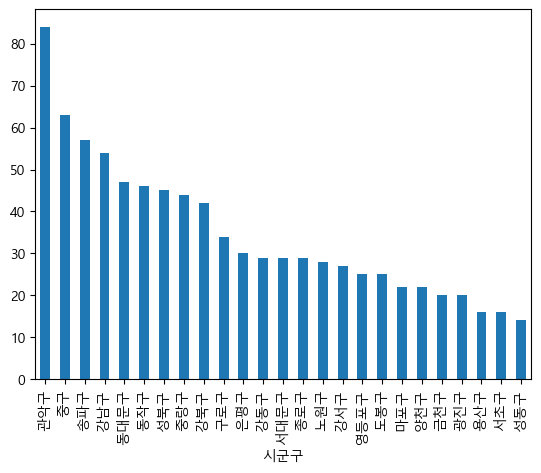

In [16]:
#구별 스쿨존 보행자 발생건수 내림차순
df4.sort_values(ascending=False).plot.bar()

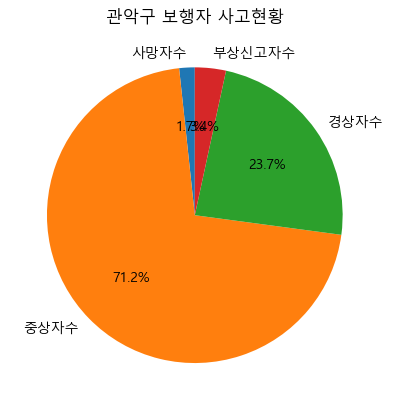

In [17]:
# 사고 건수가 가장 많은 관악구 내 교통사고
# 발생건수,사상자수, 사망자수, 중상자수, 경상자수, 부상신고자수

guro_pie = df3.loc['관악구',['사망자수', '중상자수', '경상자수', '부상신고자수']]

#파이차트

plt.pie(guro_pie, labels=guro_pie.index, autopct='%1.1f%%', startangle=90)
plt.title('관악구 보행자 사고현황')
plt.show()

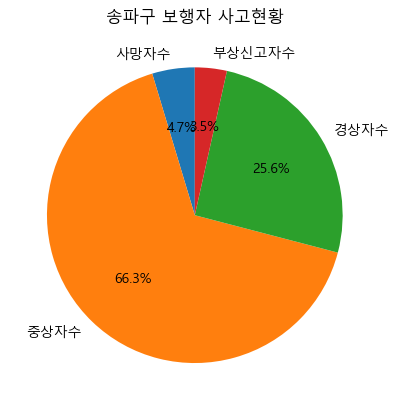

In [19]:
# CCTV 개수가 가장 적은 송파구 어린이 스쿨존 내 교통사고
# 발생건수,사상자수, 사망자수, 중상자수, 경상자수, 부상신고자수

guro_pie = df3.loc['송파구',['사망자수', '중상자수', '경상자수', '부상신고자수']]

#파이차트

plt.pie(guro_pie, labels=guro_pie.index, autopct='%1.1f%%', startangle=90)
plt.title('송파구 보행자 사고현황')
plt.show()

In [21]:
# 관악구 보행자 사고다발지역 

# 구로구 중심 좌표
center = [37.478306, 126.951502]

# 지도 객체 생성
map = folium.Map(location=center, zoom_start=12)

# 구로구에 해당하는 데이터만 필터링
songpa = df2[df2['시군구'] == '관악구']

# 데이터를 이용하여 지도에 마커 생성
for index, row in songpa.iterrows():
    lat = row['위도']
    lng = row['경도']
    location = [lat, lng]
    tooltip = f"{row['지점명']}\n발생건수: {row['발생건수']}\n사상자수: {row['사상자수']}"
    folium.Marker(location=location, tooltip=tooltip).add_to(map)

# 지도 출력
map

In [22]:
# 송파구 보행자 사고다발지역
# 송파구 중심 좌표
center = [37.504493, 127.114464]

# 지도 객체 생성
map = folium.Map(location=center, zoom_start=12)

# 송파구에 해당하는 데이터만 필터링
songpa = df2[df2['시군구'] == '송파구']

# 데이터를 이용하여 지도에 마커 생성
for index, row in songpa.iterrows():
    lat = row['위도']
    lng = row['경도']
    location = [lat, lng]
    tooltip = f"{row['지점명']}\n발생건수: {row['발생건수']}\n사상자수: {row['사상자수']}"
    folium.Marker(location=location, tooltip=tooltip).add_to(map)

# 지도 출력
map
